<a href="https://colab.research.google.com/github/rayrishiraj/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERFORMED BY: RISHIRAJ RAY**

PROBLEM: Titanic Survival Prediction

PROCEDURE TO PERFORM THE OPERATION
1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA CONTENT

4. EXPLORATORY DATA ANALYSIS

6. DATA PREPROCESSING

7. MODEL TRAINING AND EVALUATING

8. CONCLUSION

In [ ]:
#importing liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,StandardScaler,FunctionTransformer,OneHotEncoder
%matplotlib inline

In [ ]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/Titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#correlation with target value
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']

In [ ]:
#correlation with target value
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
family_size    0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000013
Pclass        -0.108615
Name: Survived, dtype: float64

In [ ]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

In [ ]:
num_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        num_data.append(column)
    else:
        object_data.append(column)

In [ ]:
num_data

['Survived', 'Pclass', 'Age', 'Fare', 'family_size']

In [ ]:
object_data

['Sex', 'Embarked']

In [ ]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
family_size     0
dtype: int64

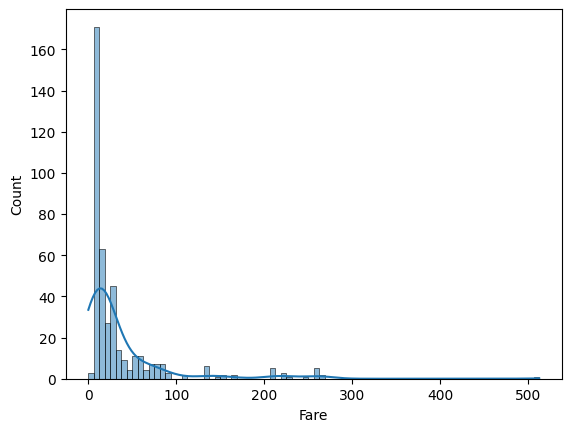

In [ ]:
sns.histplot(data=df,x='Fare',kde=True)
plt.show()

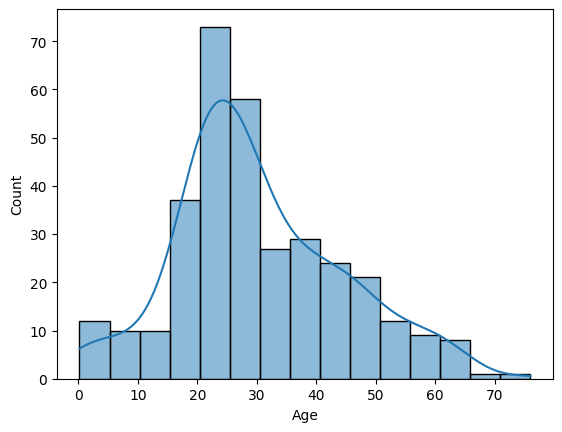

In [ ]:
sns.histplot(data=df,x='Age',kde=True)
plt.show()

In [ ]:
#as fare is right skewed we will impute the missing value with median
#as age is tends to normal we will go with mean
mean = df['Age'].mean()
median = df['Fare'].median()
df['Age'].fillna(value=mean, inplace=True)
df['Fare'].fillna(value = median, inplace=True)

In [ ]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [ ]:
num_data

['Survived', 'Pclass', 'Age', 'Fare', 'family_size']

In [ ]:
#checking for outliers
import plotly.express as px
plt.figure(figsize=(7,5))
px.box(data_frame=df, y=num_data)

<Figure size 700x500 with 0 Axes>

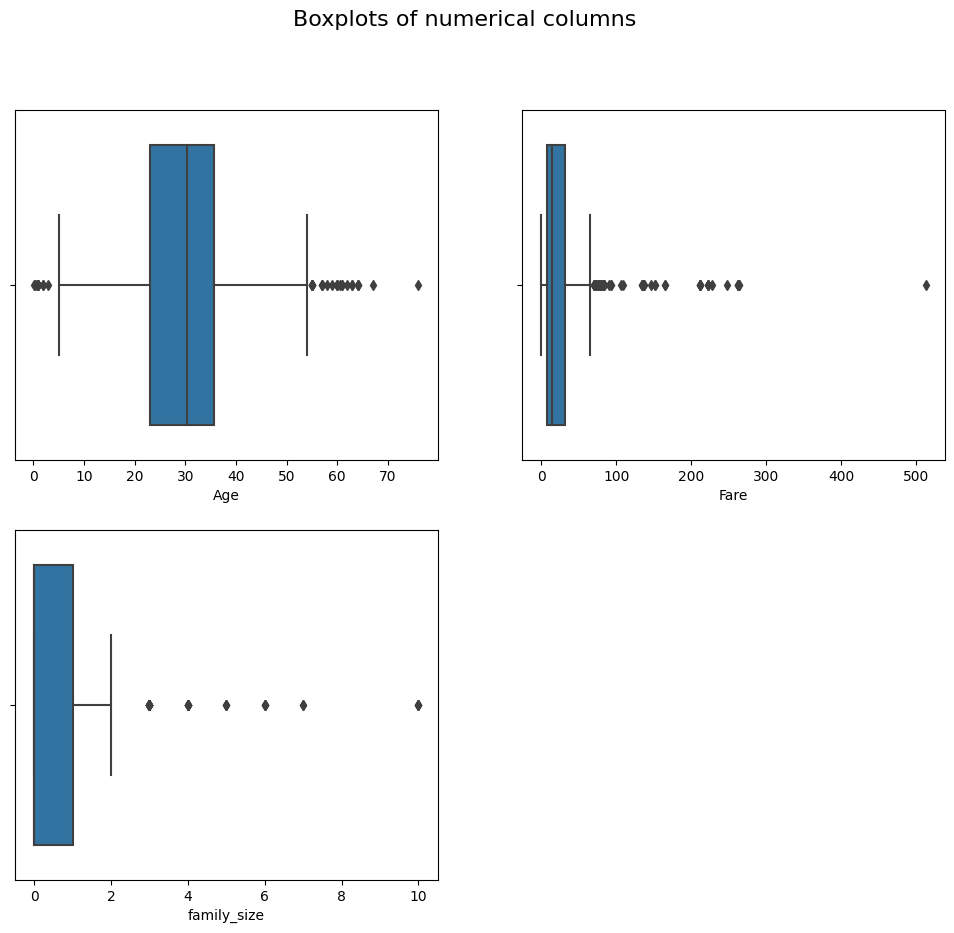

In [ ]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

In [ ]:
#find the limits
upper_limit=df["Fare"].mean() + 3*df["Fare"].std()
lower_limit=df["Fare"].mean() - 3*df["Fare"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  203.12684348891895
lower limit:  -131.97377267552184


In [ ]:
#find the outliers
outliers_df=df.loc[(df["Fare"]> upper_limit) |(df["Fare"] < lower_limit)]
outliers_df.shape

(18, 7)

In [ ]:
# For outliers I will use Quantile tranformer to scale the data and make it more normal
ft = FunctionTransformer(np.log1p)
qt = QuantileTransformer(output_distribution='normal')
x_f = pd.DataFrame(qt.fit_transform(df[['Fare','Age','family_size']]),columns=['Fare','Age','family_size'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning:

n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.



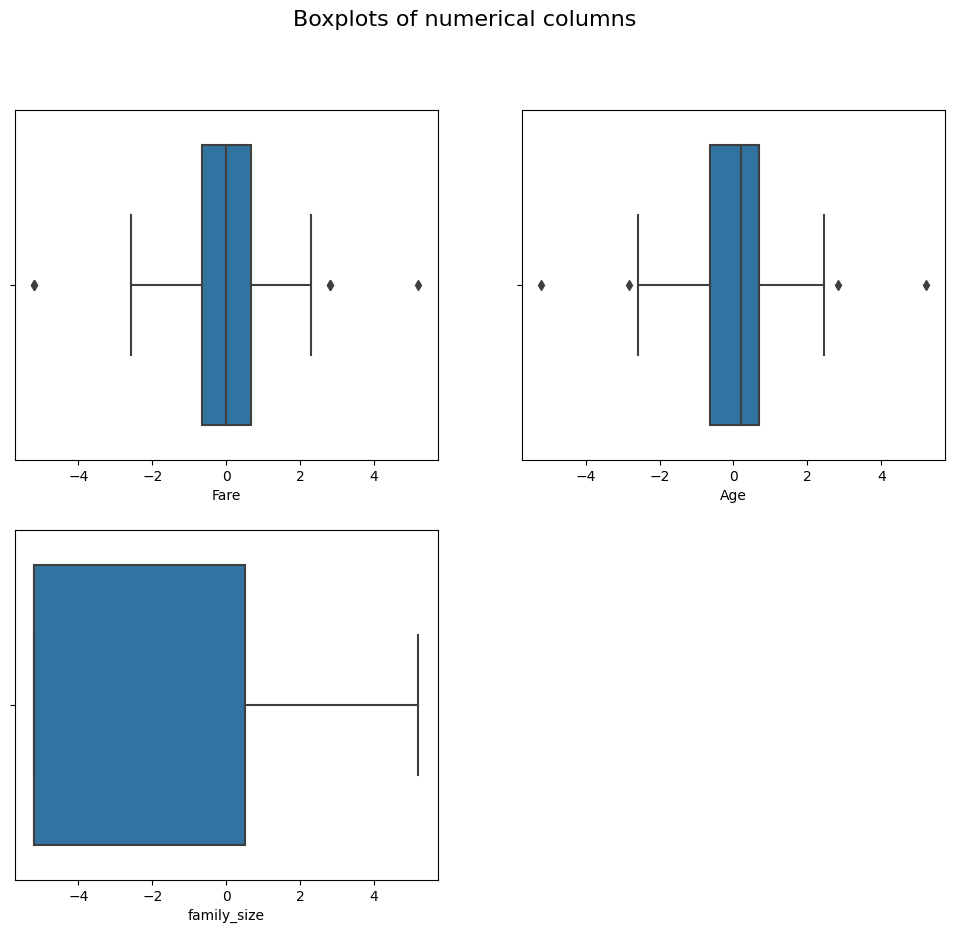

In [ ]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=x_f,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

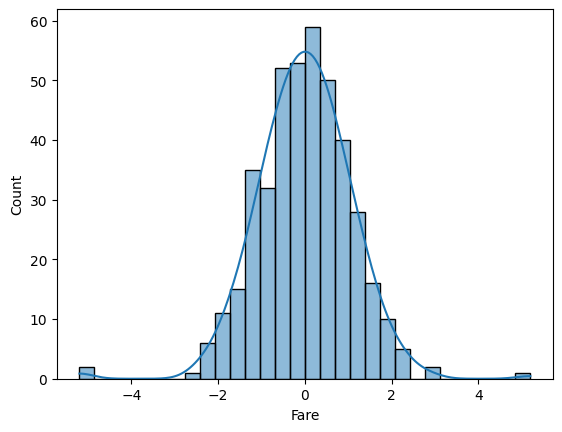

In [ ]:
sns.histplot(data=x_f,x='Fare',kde=True)
plt.show()

In [ ]:
x_f

,Fare,Age,family_size
0,-0.819555,0.631708,-5.199338
1,-2.097253,1.224872,0.507918
2,-0.333696,2.125161,-5.199338
3,-0.414296,-0.292657,-5.199338
4,-0.227360,-0.758016,1.047294
...,...,...,...
413,-0.511340,0.208892,-5.199338
414,1.479193,0.832236,-5.199338
415,-1.444206,0.802848,-5.199338
416,-0.511340,0.208892,-5.199338


In [ ]:
qt = QuantileTransformer(output_distribution='normal')
df[['Fare','Age','family_size']] = qt.fit_transform(df[['Fare','Age','family_size']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning:

n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.



In [ ]:
df["Embarked"]=df["Embarked"].replace("S",0)
df["Embarked"]=df["Embarked"].replace("C",1)
df["Embarked"]=df["Embarked"].replace("Q",2)

In [ ]:
df["Sex"]=df["Sex"].replace("male",0)
df["Sex"]=df["Sex"].replace("female",1)

In [ ]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [ ]:
X

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,0,0.631708,-0.819555,2,-5.199338
1,3,1,1.224872,-2.097253,0,0.507918
2,2,0,2.125161,-0.333696,2,-5.199338
3,3,0,-0.292657,-0.414296,0,-5.199338
4,3,1,-0.758016,-0.227360,0,1.047294
...,...,...,...,...,...,...
413,3,0,0.208892,-0.511340,0,-5.199338
414,1,1,0.832236,1.479193,1,-5.199338
415,3,0,0.802848,-1.444206,0,-5.199338
416,3,0,0.208892,-0.511340,0,-5.199338


In [ ]:
y


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
#Splitting data into trainning and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#importing the checking parameters
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

In [ ]:
#importing the libraries
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [ ]:
# multiple model trainning
highest_accuracy_test = 0.8
model = [LGBMClassifier(),KNeighborsClassifier(), LogisticRegression(), SVC()]
for i in model:
  for i in model:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(i,'Accuracy on Test data : ', acc)
    print(i,"Classification_report: \n",classification_report(y_test, y_pred))
    if (acc > highest_accuracy_test):
       highest_accuracy_test = acc
       acc = acc.round(2)
       j = i
    print(" ")

print(" ")
print(j,'has the highest Accuracy in test data: ', highest_accuracy_test)

[LightGBM] [Info] Number of positive: 118, number of negative: 216
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353293 -> initscore=-0.604594
[LightGBM] [Info] Start training from score -0.604594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

**Conclusion:**

1. I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.
2. We then investigated ten predictive models. The data was split in 2 parts, a train set and a test set.
3. As we can see from the analysis above the best model for diagnosing **Titanic Survial Prediction** is **"Light Gradient Boosting Classifier"** with an accuracy of **100%**